# T1 - Parte 5

## 5 - Regressão Linear com regularização

### 5.1 - Visualização dos Dados

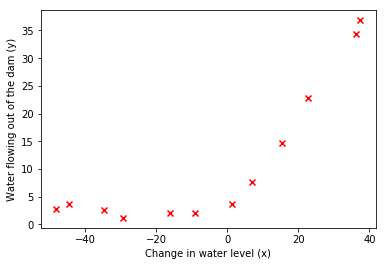

In [9]:
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize


# 5.1 - Visualizacao dos dados
mat = spio.loadmat('ex5data1.mat', squeeze_me=True)

X = mat['X']
y = mat['y']

Xtest = mat['Xtest']
ytest = mat['ytest']

Xval = mat['Xval']
yval = mat['yval']

plt.scatter(X, y, color='red', marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### 5.2 - Função de custo da regressão linear regularizada

In [10]:
# 5.2 - Funcao de custo da regressao linear regularizada

def linearRegCostFunction(theta, X, y, lamb):
    m = len(X)

    custo = ((1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2) +
             (lamb / (2 * m)) * np.sum(theta[1:]) ** 2)

    return custo


X_ones = np.c_[np.ones((X.shape[0], 1)), X]

theta = np.ones(2)
custo = linearRegCostFunction(theta, X_ones, y, 0)
print(custo)

303.9515255535976


### 5.3 - Gradiente na regressão linear regularizada

In [11]:
def linearRegGrad(theta, X, y, lamb):
    m = len(y)

    h = X.dot(theta)

    loss = h - y

    gradient = ((1 / m) * (X.T.dot(loss)) +
                (lamb / m) * theta[1:])

    return gradient

grad = linearRegGrad(theta, X_ones, y, 0)
print(grad)

[-15.30301567 598.16741084]


### 5.4 - Ajustando os parâmetros da regressão linear

[13.08790353  0.36777923]


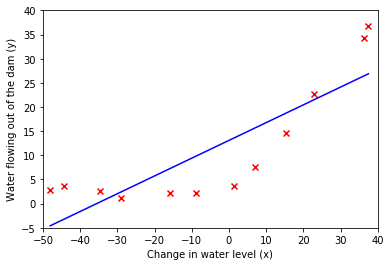

In [12]:
def trainLinearReg(theta, X, y, lamb):
    # initial_theta = np.zeros((X.shape[1],1))
    # initial_theta = np.array([[15], [15]])

    res = minimize(fun=linearRegCostFunction, x0=theta,
                   args=(X, y, lamb), method=None, jac=linearRegGrad,
                   options={'maxiter': 5000})

    return(res.x)

opt_theta = trainLinearReg(theta, X_ones, y, 0)
print(opt_theta)

grad = grad.T
t = np.linspace(X.min(), X.max())
h = np.c_[np.ones(t.shape[0]), t].dot(grad)

plt.scatter(X, y, marker='x', color='red')
# Corrigir para receber os parâmetros de theta otimizados
plt.plot(t, opt_theta[0] + (opt_theta[1] * t), color='blue',
         label='Linear Regression')
plt.axis([-50, 40, -5, 40])
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()